This file can show the results of the SOBOL results. However, I think a file created using (4) is maybe better

In [1]:
import pandas as pd

# Define the folder path and file names
folder_name = "results"
date = "2025-06-03_12-16"  # Replace with the exact date if needed

# Load the experiments DataFrame
experiments = pd.read_csv(f"{folder_name}/SOBOL_experiments_{date}.csv")

# Load the outcomes DataFrame
outcomes = pd.read_csv(f"{folder_name}/SOBOL_outcomes_{date}.csv")

print("DataFrames recreated from stored CSV files.")

DataFrames recreated from stored CSV files.


In [4]:
print(experiments.shape)
print(outcomes.shape)

(122880, 53)
(368640, 17)


In [ ]:
# only works because we have scalar outcomes
df=pd.DataFrame(outcomes)
df = df.groupby(outcomes.index // 3).sum()
df['Total Deaths']=df['A.1_Expected Number of Deaths']+df['A.2_Expected Number of Deaths']+df['A.3_Expected Number of Deaths']+df['A.4_Expected Number of Deaths']+df['A.5_Expected Number of Deaths']


In [14]:
from problem_formulation import get_model_for_problem_formulation, sum_over, sum_over_time
dike_model, planning_steps = get_model_for_problem_formulation(4)
from ema_workbench.em_framework.salib_samplers import get_SALib_problem
from SALib.analyze import sobol
import matplotlib.pyplot as plt

In [25]:
experiments

,A.0_ID flood wave shape,A.1_Bmax,A.1_Brate,A.1_pfail,A.2_Bmax,A.2_Brate,A.2_pfail,A.3_Bmax,A.3_Brate,A.3_pfail,...,A.4_DikeIncrease 0,A.4_DikeIncrease 1,A.4_DikeIncrease 2,A.5_DikeIncrease 0,A.5_DikeIncrease 1,A.5_DikeIncrease 2,EWS_DaysToThreat,scenario,policy,model
0,15,278.893134,1.5,0.528992,248.213420,10.0,0.597749,346.163456,1.0,0.896679,...,8,0,8,1,0,3,4,48,0,dikesnet
1,58,278.893134,1.5,0.528992,248.213420,10.0,0.597749,346.163456,1.0,0.896679,...,8,0,8,1,0,3,4,49,0,dikesnet
2,15,298.344980,1.5,0.528992,248.213420,10.0,0.597749,346.163456,1.0,0.896679,...,8,0,8,1,0,3,4,50,0,dikesnet
3,15,278.893134,1.5,0.528992,248.213420,10.0,0.597749,346.163456,1.0,0.896679,...,8,0,8,1,0,3,4,51,0,dikesnet
4,15,278.893134,1.5,0.076208,248.213420,10.0,0.597749,346.163456,1.0,0.896679,...,8,0,8,1,0,3,4,52,0,dikesnet
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122875,42,328.695332,10.0,0.437094,100.765608,10.0,0.188813,96.729866,1.5,0.670044,...,10,9,9,4,6,6,2,2603,47,dikesnet
122876,42,328.695332,10.0,0.437094,100.765608,10.0,0.188813,96.729866,1.5,0.670044,...,10,9,9,4,6,6,2,2604,47,dikesnet
122877,42,328.695332,10.0,0.437094,100.765608,10.0,0.188813,96.729866,1.5,0.670044,...,10,9,9,4,6,6,2,2605,47,dikesnet
122878,42,328.695332,10.0,0.437094,100.765608,10.0,0.188813,96.729866,1.5,0.670044,...,10,9,9,4,6,6,2,2606,47,dikesnet


Changing dike_model.uncertainties to model.levers is possible

In [23]:
problem = get_SALib_problem(dike_model.uncertainties)

# Filter columns that contain 'Deaths' in their name
outcomes_deaths = pd.DataFrame(outcomes).filter(like='Deaths')

# Add a column for the total deaths
outcomes_deaths['Total_Deaths'] = outcomes_deaths.sum(axis=1)

y = outcomes_deaths['Total_Deaths'].to_numpy()

Si = sobol.analyze(problem, y, calc_second_order=True, print_to_console=True)


c:\Users\twand\AppData\Local\Programs\Python\Python313\Lib\site-packages\SALib\util\__init__.py:274: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  names = list(pd.unique(groups))


                               ST   ST_conf
A.0_ID flood wave shape  0.980676  0.327345
A.1_Bmax                 0.913863  0.343540
A.1_Brate                0.006253  0.002403
A.1_pfail                0.983447  0.325063
A.2_Bmax                 0.914158  0.343646
A.2_Brate                0.000334  0.000335
A.2_pfail                0.868984  0.263887
A.3_Bmax                 0.897966  0.332549
A.3_Brate                0.003987  0.002838
A.3_pfail                0.980631  0.327317
A.4_Bmax                 0.913863  0.343540
A.4_Brate                0.016373  0.010502
A.4_pfail                0.988421  0.330146
A.5_Bmax                 0.916143  0.344329
A.5_Brate                0.000323  0.000334
A.5_pfail                0.980891  0.327368
discount rate 0          0.913879  0.343550
discount rate 1          0.000319  0.000333
discount rate 2          0.980596  0.327306
                               S1   S1_conf
A.0_ID flood wave shape -0.838066  0.086473
A.1_Bmax                -0.92384

c:\Users\twand\AppData\Local\Programs\Python\Python313\Lib\site-packages\SALib\util\__init__.py:274: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  names = list(pd.unique(groups))


array([<Axes: >, <Axes: >, <Axes: >], dtype=object)

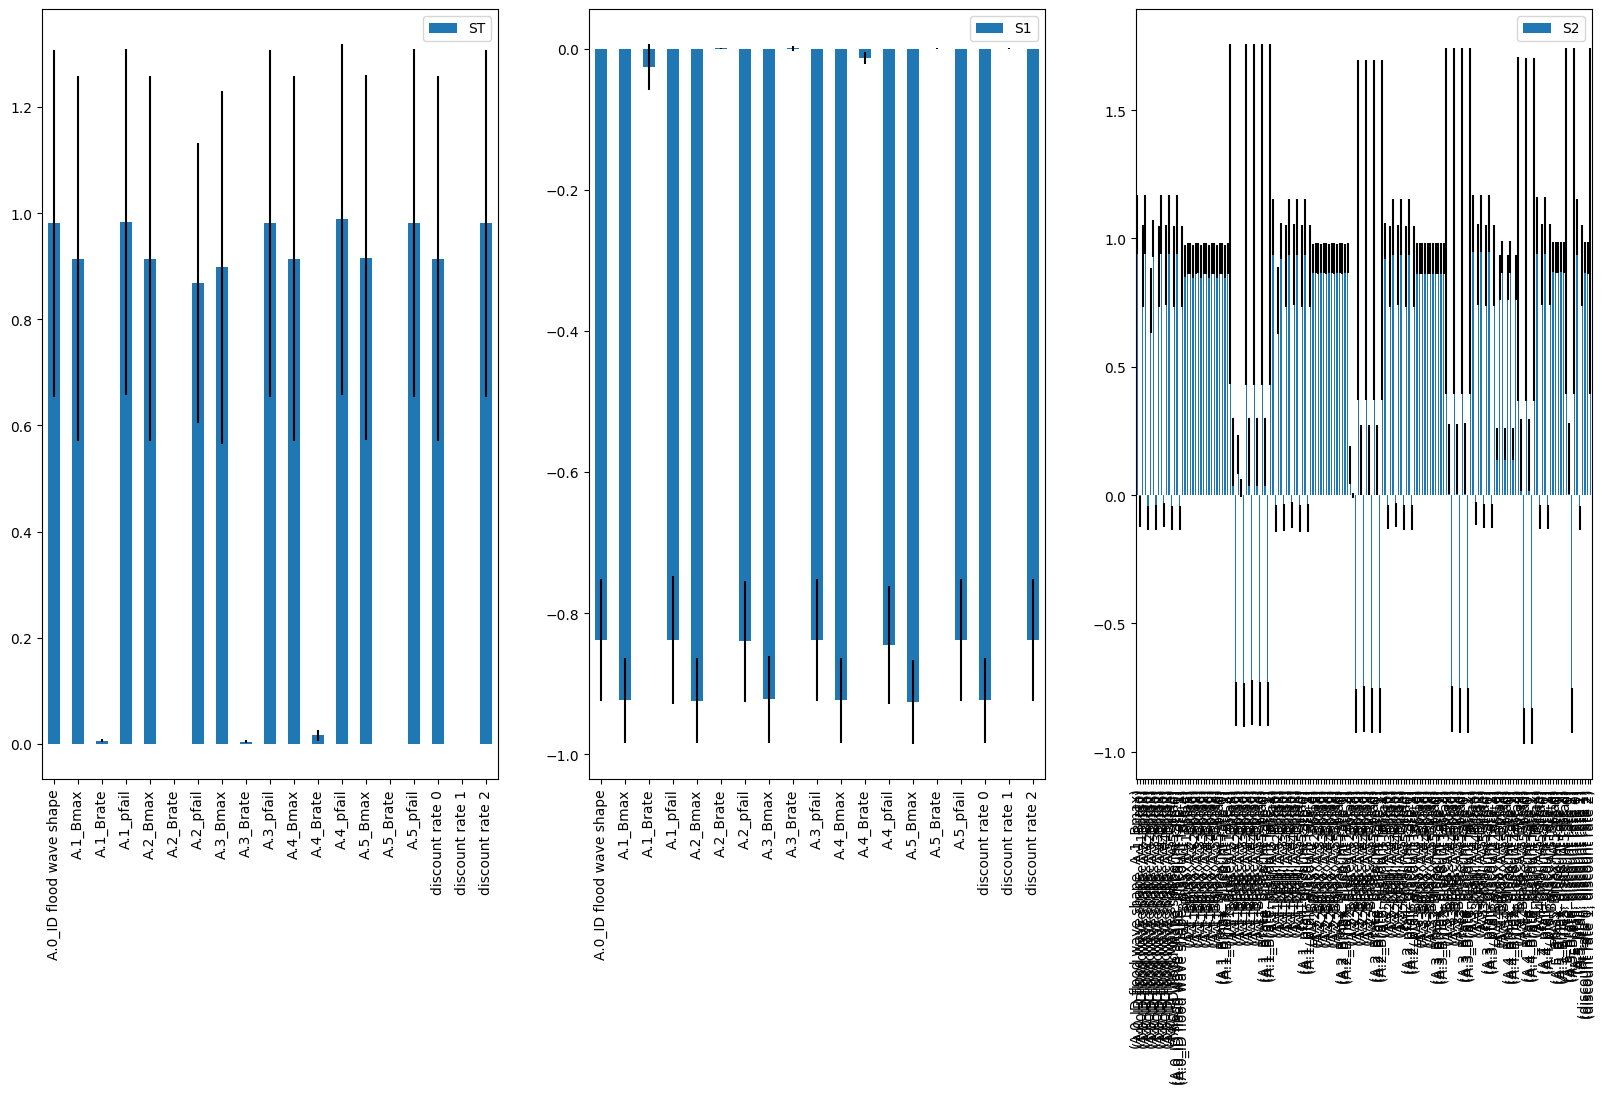

In [24]:
fig, axes = plt.subplots(1,3)
fig.set_size_inches(20, 10)
Si.plot(ax=axes)

Sobol is seemingly not working, we are getting negative values :(

Chat says 
A negative value in the S1 Sobol index (first-order sensitivity index) typically indicates an issue with the sensitivity analysis or the model setup. The Sobol indices are designed to measure the proportion of variance in the output that can be attributed to the variance in a specific input parameter. These indices should theoretically range between 0 and 1.